# Using the FuSA API to analyze audio 

This example shows how to infer the sound events present in an audio file using the [FuSA system](https://www.acusticauach.cl/fusa/) as seen in *Carrasco, Arenas, Huijse, et al. "Application of Deep-Learning to Enforce Environmental Noise Regulation in an Urban Setting"*.

Predictions come from a deep neural network served in the FuSA system architecture. The model can be accessed through an API using the [`requests`](https://requests.readthedocs.io/en/latest/) Python library or the cURL command-line tool.

Note that key-based authentication is required to use the API. To obtain a personal key please write to `enriquesuarez@uach.cl`. For the moment, only non-commercial use is allowed.

The following code obtains predictions for a sixty-second `.wav` file:

In [1]:
import os
import requests
#!pip install python-dotenv
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.environ['API_KEY']
audio_name = "data/1654219149_1654219209.wav"

r = requests.post('https://api.labacam.org/predictions', 
                  params={'model': 'PANN-tag-5s'},
                  headers={'accept': 'application/json', 'x-api-key': f'{API_KEY}'}, 
                  files={'file': open(f'{audio_name}', 'rb')})

predictions = r.json()['categories']

The routines in `plotting_utils` can be used to visualize the model predictions:

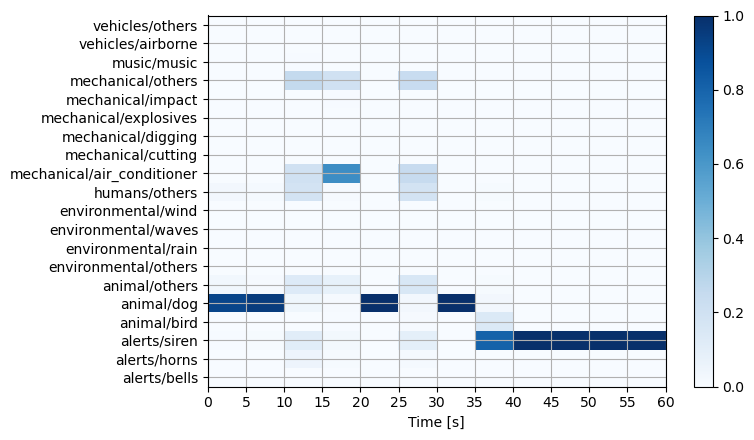

In [2]:
%matplotlib inline
from plotting_utils import plot_prediction_matrix

plot_prediction_matrix(predictions)

The model returns probabilities associated to the sound events in the FuSA taxonomy for each 5-second segment in the audio file. In this case the dominant sound events correspond to `animal/dog` and `alerts/siren`. 

We can confirm this by importing and hearing the audio:

In [3]:
import torchaudio
from IPython.display import Audio

waveform, rate = torchaudio.load(audio_name)
Audio(data=waveform[0].numpy(), rate=rate)